# 머신러닝

### 머신 러닝 방식
- 기존의 프로그래밍 방식의 한계로 등장

- 컴퓨터가 학습데이터에서 패턴을 학습하여 새로운 데이터에 대한 의사결정을 내리는 기술

- 딥러닝을 포함한 상위 단계

### 머신러닝 모델 평가
- 데이터 준비 : 훈련용(학습), 테스트용, 검증용

- 검증용데이터 : 모델이 훈련데이터에 과적합 되고 있는 지 판단하거나,
 하이퍼파라미터의 조정을 위함

- 매개변수 와 파라미터(초매개변수) :
<br>매개변수는 가중치로 모델이 학습하는 과정에서 얻어지는 값
<br>초매개변수는 모델 성능에 영향을 주는 사람이 직접 지정하는 변수

- 하이퍼파라미터를 바꿔가며 모델의 정확도를 높이고, 테스트데이터로 최종 정확도를 평가한다.

### 분류와 회귀

- 대부분의 머신러닝의 문제는 분류 또는 회귀

- 선형회귀와 로지스틱회귀가 있음

- 선형회귀는 연속적인 값 예측, 로지스틱회귀는 이항분류문제 해결

### 과적합과 과소적합
- 과적합은 테스트데이텅서 오차가 커질 가능성 농후
- 과소적합은 어디서든 정확도가 낮음, 훈련횟수인 에포크가 꽤나 적으면 발생

### 일반적인 딥러닝 학습과정
* Step 1. 주어진 데이터를 훈련 데이터, 검증 데이터, 테스트 데이터로 나눈다. 가령, 6:2:2 비율로 나눌 수 있다.
* Step 2. 훈련 데이터로 모델을 학습한다. (에포크 +1)
* Step 3. 검증 데이터로 모델을 평가하여 검증 데이터에 대한 정확도와 오차(loss)를 계산한다.
* Step 4. 검증 데이터의 오차가 증가하였다면 과적합 징후이므로 학습 종료 후 Step 5로 이동, 아니라면 Step 2.로 재이동한다.
* Step 5. 모델의 학습이 종료되었으니 테스트 데이터로 모델을 평가한다.

----------------------

### 선형회귀

1) 선형회귀식

    <span style="color:skyblue">y = w1*x1 + w2*x2 + w3*x3 + b</span>

    y는 종속변수<br>
    w1은 가중치1<br>
    x1은 독립변수1<br>
    b는 오차(상수)

2) X와 Y의 관계에 대해 가설 설정<br>

    <span style="color:skyblue">H0 : X는 Y에 영향을 미치지 않을 것이다.</span><br>
    <span style="color:skyblue">HA : X는 Y에 영향을 미칠 것이다.</span><br>

3) 비용함수

    목적함수(비용함수) : 실제값과 예측값의 오차에 관한 식<br>
    회귀문제의 경우 평균제곱오차(MSE) 사용<br>
    w와 b 찾기
    
    (x)hour 	2	3	4	5<br>
    실제값	25	50	42	61<br>
    예측값	27	40	53	66<br>
    <span style="color:orange">오차	-2	10	-9	-5</span><br>

    [오차 = 실제값 - 예측값] 하면 음수 양수 섞여서 머리아퍼<br>
    그래서 모든 오차를 제곱하여 양수로 만들어서 더하고<br>
    더한 값을 데이터 수로 나눠서 MSE를 계산한다.

    <span style="color:skyblue">결론적으로 MSE가 작아지는 w, b를 구하면 된다.</span>
    
    --------

### 옵티마이저 : 경사하강법

따라서 머신러닝의 학습이란 MSE를 최소화하는 w,b를 찾는 것<br>
이때 사용하는 알고리즘을 옵티마이저(최적화 알고리즘)이라 칭함<br>
그 수많은 옵티마이저 중 가장 기본적인 <span style="color:skyblue">경사 하강법</span>

![image1](https://wikidocs.net/images/page/53560/%EA%B7%B8%EB%A6%BC4.PNG)

빨간 화살표가 오차, 즉 W이다.<br>
오차를 줄이는 것은 W=0 에 수렴하면 되는 것

![image2](https://wikidocs.net/images/page/21670/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%801.JPG)

쉽게 이 그래프에서는 W는 기울기가 된다.<br>
W=0 에 수렴해야하니까<br>
볼록한 저 부분에 있으면 된다.<br>
그래서 우리는 머신러닝에서 저 볼록한 부분을 찾는 최적화를 진행한다.<br><br>

![image3](https://wikidocs.net/images/page/21670/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%804-2.JPG)

볼록한 부분 찾는 법!<br>
w값을 바꾸면서 계속 미분한다~<br>
물론 b도 동시에 수행해야함

-------


### 1. 자동미분

In [10]:
import tensorflow as tf
import numpy as np

In [11]:
w = tf.Variable(2.)

def f(w):
  y = w**2
  z = 2*y + 5
  return z

In [12]:
with tf.GradientTape() as tape:
  z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


### 2. 선형회귀구현

###### @tf.function 은 자동 미분 지원임

In [13]:
#매개변수 임의설정
w = tf.Variable(4.0)
b = tf.Variable(1.0)

In [14]:
#선형회귀식 가설 설정
@tf.function
def hypothesis(x):
  return w*x + b

In [15]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [16]:
#MSE 정의
@tf.function
def mse_loss(y_pred, y):
  # 두 개의 차이값을 제곱을 해서 평균을 취한다.
  return tf.reduce_mean(tf.square(y_pred - y))

In [17]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적
optimizer = tf.optimizers.SGD(0.01) #학습률 α를 0.01로 설정 #경사하강법(SGD)

In [4]:
from tensorflow.keras import optimizers

In [21]:
for i in range(301):
  with tf.GradientTape() as tape:
    # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
    y_pred = hypothesis(x)

    # 평균 제곱 오차를 계산
    cost = mse_loss(y_pred, y)

  # 손실 함수에 대한 파라미터의 미분값 계산
  gradients = tape.gradient(cost, [w, b]) #교재에서 s붙여서 오타남

  # 파라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [w, b]))

  if i % 10 == 0:
    print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

epoch :   0 | w의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | w의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | w의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328165
epoch :  30 | w의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306967
epoch :  40 | w의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | w의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | w의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252898
epoch :  70 | w의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | w의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223598
epoch :  90 | w의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | w의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | w의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | w의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | w의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | w의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | w의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

-------

### 로지스틱 회귀
일상에서 적용<br>
육초연에서 육회를 먹을까 연어를 먹을까 하는 이진 분류...라던지

1. 이진 분류

    선형회귀식으로 2진 분류 문제를 표현하긴 부적절<br>
    대부분 이진 분류는 두개의 값을 가지고 S자 느낌의 그래프<br>
    <span style="color:skyblue">시그모이드 함수 사용</span>

2. 시그모이드 함수

    <span style="color:skyblue">H(x) = sigmoid(wx + b)</span>

    이 또한 적절한 w와 b를 구하는 것

In [37]:
import numpy as np
import matplotlib.pyplot as plt

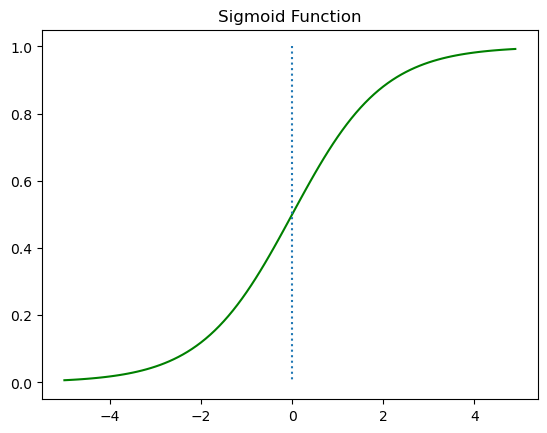

In [39]:
# w = 1, b = 0 가정
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

w값을 변화시켜 경사도 변화 보기<br>(시그모이드에서 w는 기울기가 아닌 경사도 결정)

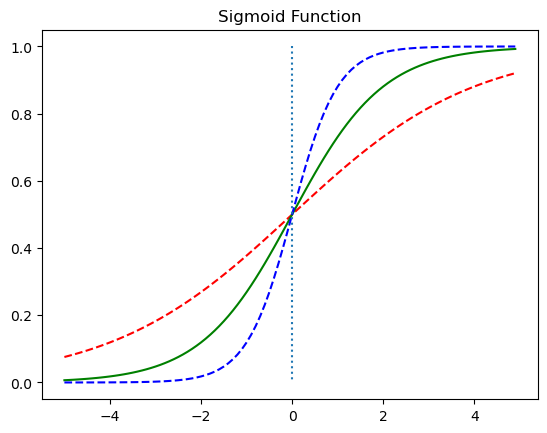

In [40]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # w의 값이 0.5일때
plt.plot(x, y2, 'g') # w의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # w의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

b값을 변화시켜 그래프 위치의 변화 보기
(b값에 따라 그래프가 이동함)

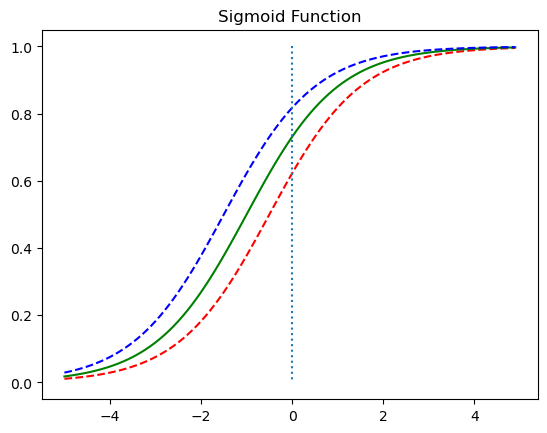

In [41]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

### 3. 비용함수(목적함수)

로지스틱회귀에서는 선형회수와 달리 MSE를 사용하지 않음<br>
로그함수를 통해서 엔트로피 함수를 찾아냄<br>
크로스 엔트로피 함수 사용

![graph1](https://wikidocs.net/images/page/22881/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%801.JPG)

<br>
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtext>if&#xA0;</mtext>
  <mi>y</mi>
  <mo>=</mo>
  <mn>1</mn>
  <mo stretchy="false">&#x2192;</mo>
  <mtext>cost</mtext>
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">(</mo>
    <mi>H</mi>
    <mo stretchy="false">(</mo>
    <mi>x</mi>
    <mo stretchy="false">)</mo>
    <mo>,</mo>
    <mi>y</mi>
    <mo data-mjx-texclass="CLOSE">)</mo>
  </mrow>
  <mo>=</mo>
  <mo>&#x2212;</mo>
  <mi>log</mi>
  <mo data-mjx-texclass="NONE">&#x2061;</mo>
  <mrow>
    <mo data-mjx-texclass="OPEN">(</mo>
    <mi>H</mi>
    <mo stretchy="false">(</mo>
    <mi>x</mi>
    <mo stretchy="false">)</mo>
    <mo data-mjx-texclass="CLOSE">)</mo>
  </mrow>
</math>
<br>
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtext>if&#xA0;</mtext>
  <mi>y</mi>
  <mo>=</mo>
  <mn>0</mn>
  <mo stretchy="false">&#x2192;</mo>
  <mtext>cost</mtext>
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">(</mo>
    <mi>H</mi>
    <mo stretchy="false">(</mo>
    <mi>x</mi>
    <mo stretchy="false">)</mo>
    <mo>,</mo>
    <mi>y</mi>
    <mo data-mjx-texclass="CLOSE">)</mo>
  </mrow>
  <mo>=</mo>
  <mo>&#x2212;</mo>
  <mi>log</mi>
  <mo data-mjx-texclass="NONE">&#x2061;</mo>
  <mrow>
    <mo data-mjx-texclass="OPEN">(</mo>
    <mn>1</mn>
    <mo>&#x2212;</mo>
    <mi>H</mi>
    <mo stretchy="false">(</mo>
    <mi>x</mi>
    <mo stretchy="false">)</mo>
    <mo data-mjx-texclass="CLOSE">)</mo>
  </mrow>
</math>

![graph2](https://wikidocs.net/images/page/22881/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%802.JPG)

<br>
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>J</mi>
  <mo stretchy="false">(</mo>
  <mi>w</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mo>&#x2212;</mo>
  <mfrac>
    <mn>1</mn>
    <mi>n</mi>
  </mfrac>
  <munderover>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mrow data-mjx-texclass="ORD">
      <mi>i</mi>
      <mo>=</mo>
      <mn>1</mn>
    </mrow>
    <mrow data-mjx-texclass="ORD">
      <mi>n</mi>
    </mrow>
  </munderover>
  <mo stretchy="false">[</mo>
  <msup>
    <mi>y</mi>
    <mrow data-mjx-texclass="ORD">
      <mo stretchy="false">(</mo>
      <mi>i</mi>
      <mo stretchy="false">)</mo>
    </mrow>
  </msup>
  <mi>l</mi>
  <mi>o</mi>
  <mi>g</mi>
  <mi>H</mi>
  <mo stretchy="false">(</mo>
  <msup>
    <mi>x</mi>
    <mrow data-mjx-texclass="ORD">
      <mo stretchy="false">(</mo>
      <mi>i</mi>
      <mo stretchy="false">)</mo>
    </mrow>
  </msup>
  <mo stretchy="false">)</mo>
  <mo>+</mo>
  <mo stretchy="false">(</mo>
  <mn>1</mn>
  <mo>&#x2212;</mo>
  <msup>
    <mi>y</mi>
    <mrow data-mjx-texclass="ORD">
      <mo stretchy="false">(</mo>
      <mi>i</mi>
      <mo stretchy="false">)</mo>
    </mrow>
  </msup>
  <mo stretchy="false">)</mo>
  <mi>l</mi>
  <mi>o</mi>
  <mi>g</mi>
  <mo stretchy="false">(</mo>
  <mn>1</mn>
  <mo>&#x2212;</mo>
  <mi>H</mi>
  <mo stretchy="false">(</mo>
  <msup>
    <mi>x</mi>
    <mrow data-mjx-texclass="ORD">
      <mo stretchy="false">(</mo>
      <mi>i</mi>
      <mo stretchy="false">)</mo>
    </mrow>
  </msup>
  <mo stretchy="false">)</mo>
  <mo stretchy="false">)</mo>
  <mo stretchy="false">]</mo>
</math>

----

### 1. 케라스로 구현
독립 변수 데이터를 x<br>
숫자 10 이상인 경우에는 1, 미만인 경우에는 0을 부여한 레이블 데이터를 y

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) # 숫자 10부터 1

model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])

model.fit(x, y, epochs=200)

Epoch 1/200



1/1 [==============================] - 1s 885ms/step - loss: 14.0912 - binary_accuracy: 0.1538
Epoch 2/200
1/1 [==============================] - 0s 7ms/step - loss: 8.6154 - binary_accuracy: 0.1538
Epoch 3/200
1/1 [==============================] - 0s 9ms/step - loss: 3.2349 - binary_accuracy: 0.1538
Epoch 4/200
1/1 [==============================] - 0s 11ms/step - loss: 0.2495 - binary_accuracy: 0.9231
Epoch 5/200
1/1 [==============================] - 0s 6ms/step - loss: 0.2366 - binary_accuracy: 0.9231
Epoch 6/200
1/1 [==============================] - 0s 10ms/step - loss: 0.2288 - binary_accuracy: 0.9231
Epoch 7/200
1/1 [==============================] - 0s 18ms/step - loss: 0.2234 - binary_accuracy: 0.9231
Epoch 8/200
1/1 [==============================] - 0s 14ms/step - loss: 0.2194 - binary_accuracy: 0.9231
Epoch 9/200
1/1 [==============================] - 0s 15ms/step - loss: 0.2163 - binary_accuracy: 0.9231
Epoch 10/200
1/1 [==============================] - 0s 11ms/step - l

1/1 [==============================] - 0s 105ms/step


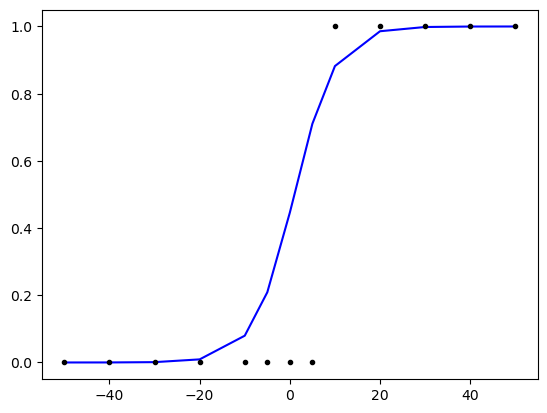

In [3]:
plt.plot(x, model.predict(x), 'b', x,y, 'k.')

In [23]:
print(model.predict([1, 2, 3, 4, 4.5])) # 5보다 작은 x -> 0.5보다 작은 y
print(model.predict([11, 21, 31, 41, 500])) # 10보다 큰 x -> 0.5보다 큰 y

1/1 [==============================] - 0s 69ms/step
[[0.50159097]
 [0.557082  ]
 [0.6111839 ]
 [0.66267884]
 [0.6871302 ]]
1/1 [==============================] - 0s 65ms/step
[[0.9034361 ]
 [0.98863333]
 [0.9987648 ]
 [0.99986696]
 [1.        ]]


----------

### 다중 입력에 대한 실습

1. 다중 선형회귀

In [24]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>H</mi>
  <mo stretchy="false">(</mo>
  <mi>X</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mrow data-mjx-texclass="ORD">
    <msub>
      <mi>w</mi>
      <mn>1</mn>
    </msub>
    <msub>
      <mi>x</mi>
      <mn>1</mn>
    </msub>
    <mo>+</mo>
    <msub>
      <mi>w</mi>
      <mn>2</mn>
    </msub>
    <msub>
      <mi>x</mi>
      <mn>2</mn>
    </msub>
    <mo>+</mo>
    <msub>
      <mi>w</mi>
      <mn>3</mn>
    </msub>
    <msub>
      <mi>x</mi>
      <mn>3</mn>
    </msub>
    <mo>+</mo>
    <mi>b</mi>
  </mrow>
</math>

In [26]:
# 중간 고사, 기말 고사, 가산점 점수 -> 독립변수 x1 x2 x3
X = np.array([[70,85,11], [71,89,18], [50,80,20], [99,20,10], [50,10,10]])
# 최종 환산 점수 -> 종속변수 y 
y = np.array([73, 82 ,72, 57, 34])

상위 5개 데이터 -> 훈련(학습) <br>
나머지 2개 데이터 -> 테스트

In [27]:
#학습
model = Sequential()
model.add(Dense(1, input_dim=3, activation='linear'))

sgd = optimizers.SGD(learning_rate=0.0001)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(X, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 393ms/step - loss: 655.5768 - mse: 655.5768
Epoch 2/2000
1/1 [==============================] - 0s 6ms/step - loss: 401.3403 - mse: 401.3403
Epoch 3/2000
1/1 [==============================] - 0s 7ms/step - loss: 248.6851 - mse: 248.6851
Epoch 4/2000
1/1 [==============================] - 0s 8ms/step - loss: 155.8083 - mse: 155.8083
Epoch 5/2000
1/1 [==============================] - 0s 6ms/step - loss: 98.5908 - mse: 98.5908
Epoch 6/2000
1/1 [==============================] - 0s 10ms/step - loss: 62.9314 - mse: 62.9314
Epoch 7/2000
1/1 [==============================] - 0s 13ms/step - loss: 40.4743 - mse: 40.4743
Epoch 8/2000
1/1 [==============================] - 0s 11ms/step - loss: 26.1999 - mse: 26.1999
Epoch 9/2000
1/1 [==============================] - 0s 12ms/step - loss: 17.0534 - mse: 17.0534
Epoch 10/2000
1/1 [==============================] - 0s 14ms/step - loss: 11.1522 - mse: 11.1522
Epoch 11/2000
1/1 [===============

In [30]:
#예측
print(model.predict(X))

1/1 [==============================] - 0s 32ms/step
[[72.91899 ]
 [81.98141 ]
 [72.101685]
 [57.12077 ]
 [33.799046]]


In [31]:
X_test = np.array([[20,99,10], [40,50,20]])
print(model.predict(X_test))

1/1 [==============================] - 0s 34ms/step
[[57.871914]
 [56.06957 ]]


In [33]:
y = np.array([73, 82 ,72, 57, 34])
print(y) # 위의 두 코드결과랑 비교해보면 비슷함

[73 82 72 57 34]


2. 다중 로지스틱 회귀

if<br>
x1 + x2 >= 2<br>
y = 1
<br>

elif<br>
x1 + x2 < 2<br>
y = 0

In [34]:
X = np.array([[0, 0], [0, 1], [1, 0], [0, 2], [1, 1], [2, 0]])
y = np.array([0, 0, 0, 1, 1, 1])

model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])

model.fit(X, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 1s 704ms/step - loss: 0.7471 - binary_accuracy: 0.5000
Epoch 2/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.7463 - binary_accuracy: 0.3333
Epoch 3/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.7455 - binary_accuracy: 0.3333
Epoch 4/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.7448 - binary_accuracy: 0.3333
Epoch 5/2000
1/1 [==============================] - 0s 15ms/step - loss: 0.7440 - binary_accuracy: 0.3333
Epoch 6/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.7432 - binary_accuracy: 0.3333
Epoch 7/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.7425 - binary_accuracy: 0.3333
Epoch 8/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.7417 - binary_accuracy: 0.3333
Epoch 9/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.7410 - binary_accuracy: 0.3333
Epoch 10/2000
1/1 [============================

In [36]:
print(model.predict(X))

1/1 [==============================] - 0s 39ms/step
[[0.18584567]
 [0.4569393 ]
 [0.46318832]
 [0.75618786]
 [0.7607961 ]
 [0.7653442 ]]


In [39]:
x1_x2 = np.array([0,1,1,2,2,2])
x1_x2
# 합이 2이상인 거는 위에서 0.5가 넘음

array([0, 1, 1, 2, 2, 2])

-------

# 소프트맥스 회귀

이진 분류가 아닌 3개 이상의 선택지라면?

### 1. 다중 클래스 분류<br>
참이슬인지, 새로인지, 진로인지 예측

### 2. 소프트맥수 함수
선택지가 K개일 때, K차원의 벡터를 입력받아<br>
각 클래스에 대한 확률 추정

- 소프트맥수 함수 이해<br>

![softmax](https://wikidocs.net/images/page/35476/softmax1_final_final_ver.PNG)


### 3. 소프트맥수 회귀를 위한 전처리

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [41]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/06.%20Machine%20Learning/dataset/Iris.csv", filename="Iris.csv")

data = pd.read_csv('Iris.csv', encoding='latin1')

print('샘플의 개수 :', len(data))
print(data[:5])

샘플의 개수 : 150
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [42]:
# 중복을 허용하지 않고, 있는 데이터의 모든 종류를 출력
print("품종 종류:", data["Species"].unique(), sep="\n")

품종 종류:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


c:\Users\SKW\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SKW\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SKW\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SKW\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical

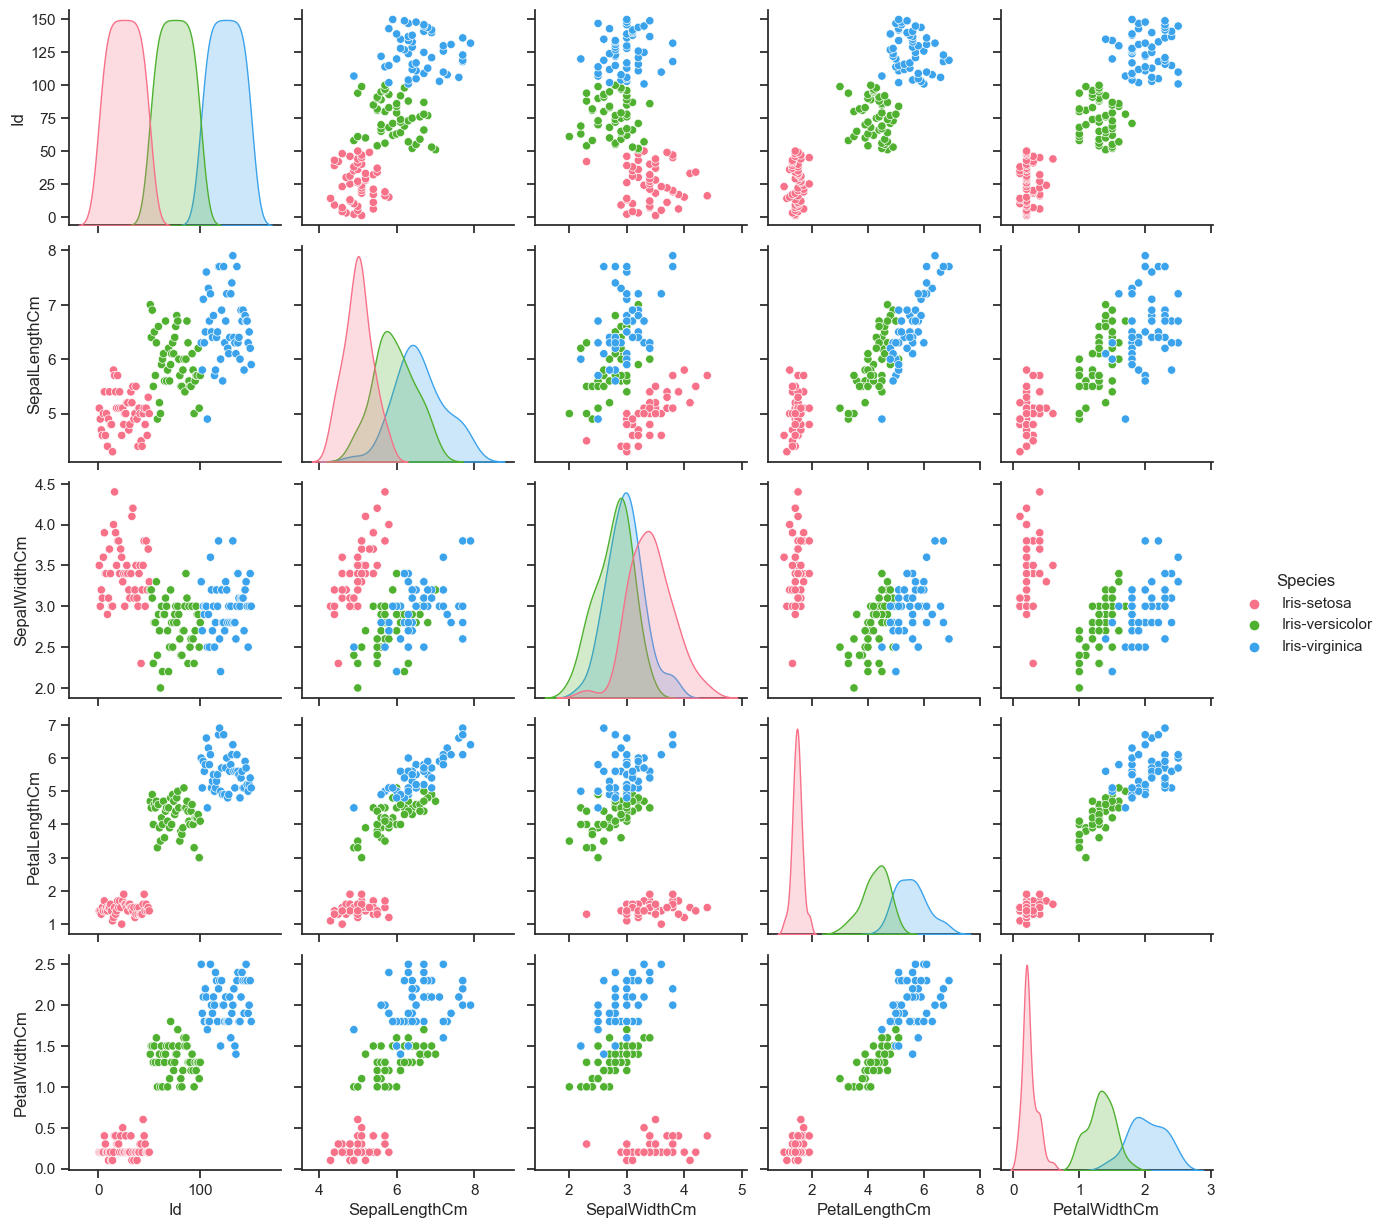

In [43]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, hue="Species", palette="husl")

C:\Users\SKW\AppData\Local\Temp\ipykernel_13020\2844164756.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Species', y='SepalWidthCm', data=data, ci=None)
c:\Users\SKW\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SKW\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SKW\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Species', ylabel='SepalWidthCm'>

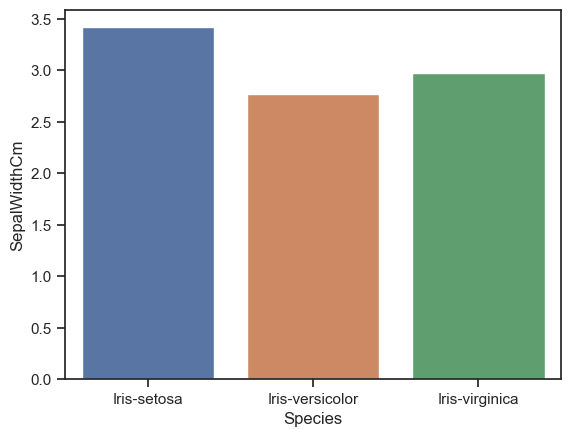

In [44]:
# 각 종과 특성에 대한 연관 관계
sns.barplot(x='Species', y='SepalWidthCm', data=data, ci=None)

<Axes: xlabel='Species'>

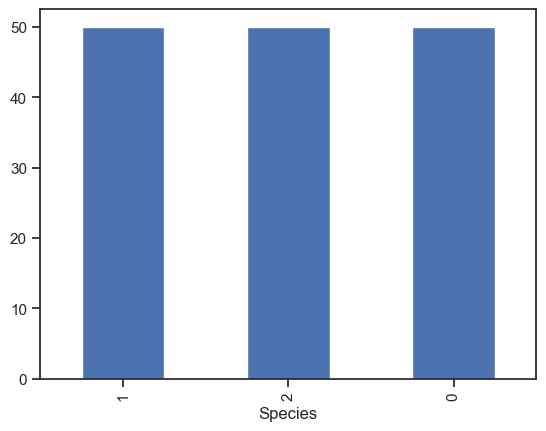

In [45]:
# Iris-virginica는 0, Iris-setosa는 1, Iris-versicolor는 2가 됨.
data['Species'] = data['Species'].replace(['Iris-virginica','Iris-setosa','Iris-versicolor'],[0,1,2])
data['Species'].value_counts().plot(kind='bar')

In [46]:
# X 데이터. 특성은 총 4개.
data_X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

# Y 데이터. 예측 대상.
data_y = data['Species'].values

print(data_X[:5])
print(data_y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[1 1 1 1 1]


In [47]:
# 훈련 데이터와 테스트 데이터를 8:2로 나눈다.
(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size=0.8, random_state=1)

# 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])
print(y_test[:5])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


### 4. 소프트맥수 회귀

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=1, validation_data=(X_test, y_test))

Epoch 1/200
120/120 [==============================] - 2s 8ms/step - loss: 1.4280 - accuracy: 0.2417 - val_loss: 1.3051 - val_accuracy: 0.4000
Epoch 2/200
120/120 [==============================] - 0s 3ms/step - loss: 1.2667 - accuracy: 0.2833 - val_loss: 1.2393 - val_accuracy: 0.3000
Epoch 3/200
120/120 [==============================] - 0s 3ms/step - loss: 1.1897 - accuracy: 0.3417 - val_loss: 1.1817 - val_accuracy: 0.2667
Epoch 4/200
120/120 [==============================] - 0s 3ms/step - loss: 1.1228 - accuracy: 0.3500 - val_loss: 1.1157 - val_accuracy: 0.2667
Epoch 5/200
120/120 [==============================] - 0s 3ms/step - loss: 1.0648 - accuracy: 0.4083 - val_loss: 1.0491 - val_accuracy: 0.3667
Epoch 6/200
120/120 [==============================] - 0s 3ms/step - loss: 1.0167 - accuracy: 0.4000 - val_loss: 0.9867 - val_accuracy: 0.4000
Epoch 7/200
120/120 [==============================] - 0s 3ms/step - loss: 0.9661 - accuracy: 0.5250 - val_loss: 0.9526 - val_accuracy: 0.4333

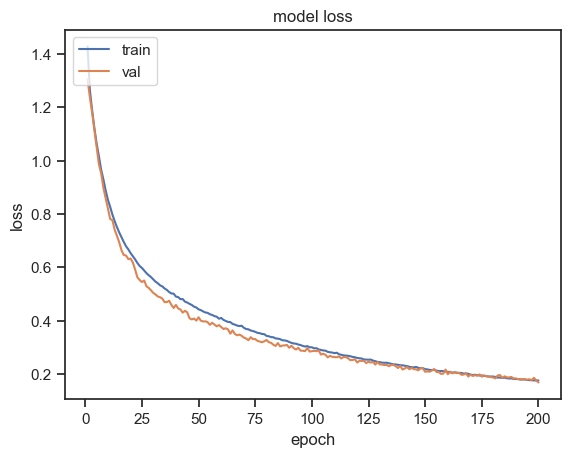

In [49]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [50]:
print("\n Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


1/1 [==============================] - 0s 295ms/step - loss: 0.1681 - accuracy: 1.0000

 Accuracy: 1.0000
